In [123]:
# 1. Importar librer√≠as necesarias

import os
os.environ["OMP_NUM_THREADS"] = "4"  # Limita los hilos para evitar memory leak en Windows

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_score, davies_bouldin_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import cdist
import numpy as np





# Para mostrar gr√°ficos en Jupyter Notebook
%matplotlib inline

# 2. Cargar el dataset (aseg√∫rate de tener la ruta correcta)
dataset = pd.read_csv('archivo_gym_members_exercise_tracking_version2.csv')

### Paso 3. Seleccion de las variables fisicas que se usaran para clustering. Normalizaci√≥n expl√≠cita de las variables

In [124]:
# 3. Seleccionar las variables f√≠sicas que usaremos para clustering
features = ['Age', 'Weight (kg)', 'Height (m)', 'BMI', 'Fat_Percentage', 'Experience_Level', 'Workout_Frequency (days/week)']
X = dataset[features]

# Aplicamos StandardScaler a las variables, para que todas est√©n en la misma escala.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Paso 4 - M√©tricas de K-means para elegir K optimo


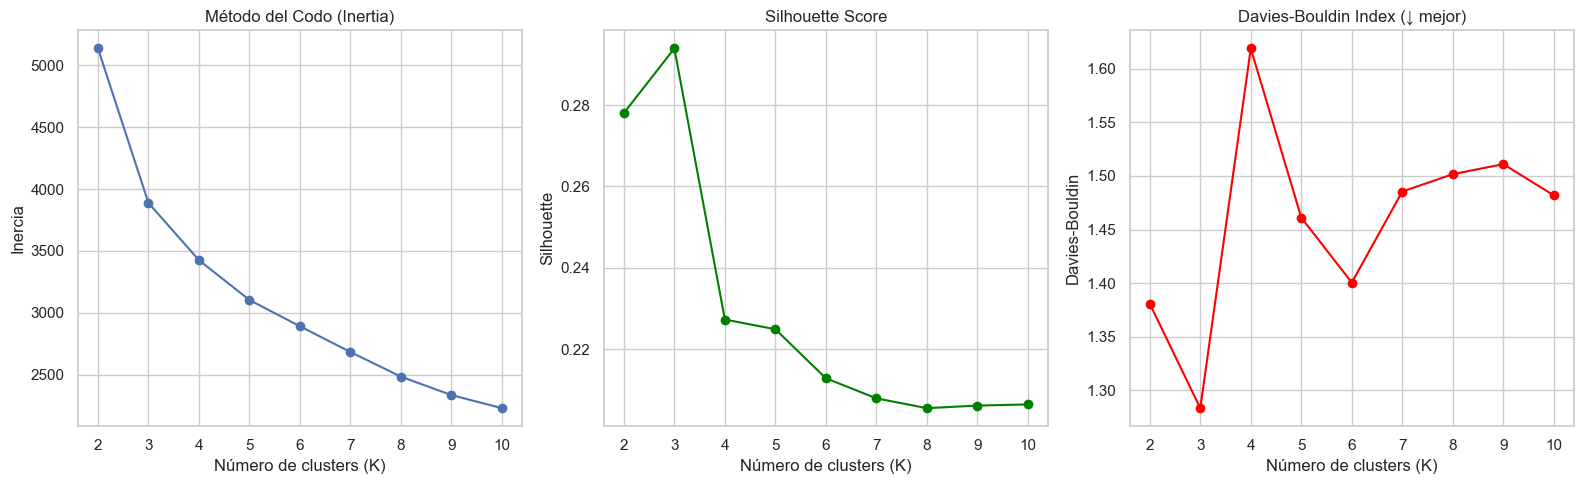

In [140]:
# 5. Evaluar m√©tricas para distintos valores de K
K_range = range(2, 11)
inertias = []
silhouettes = []

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    
    inertias.append(kmeans.inertia_)
    silhouettes.append(silhouette_score(X_scaled, labels))

# 6. Visualizar resultados
plt.figure(figsize=(16, 5))

plt.subplot(1, 3, 1)
plt.plot(K_range, inertias, marker='o')
plt.title("M√©todo del Codo (Inertia)")
plt.xlabel("N√∫mero de clusters (K)")
plt.ylabel("Inercia")

plt.subplot(1, 3, 2)
plt.plot(K_range, silhouettes, marker='o', color='green')
plt.title("Silhouette Score")
plt.xlabel("N√∫mero de clusters (K)")
plt.ylabel("Silhouette")

plt.subplot(1, 3, 3)
plt.plot(K_range, davies, marker='o', color='red')
plt.title("Davies-Bouldin Index (‚Üì mejor)")
plt.xlabel("N√∫mero de clusters (K)")
plt.ylabel("Davies-Bouldin")

plt.tight_layout()
plt.show()

### Paso 5. Aplicamos K-Means con el valor de K=4 obtenido de las graficas

In [126]:
# Aplicamos KMeans con K=4
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
labels = kmeans.fit_predict(X)

# Asignar etiquetas de cluster al dataset
dataset['cluster'] = kmeans.labels_

##### _Pasos 4 y 5 ‚Äì Elecci√≥n del n√∫mero √≥ptimo de clusters (K=3)_

Para determinar el n√∫mero √≥ptimo de clusters, se evaluaron varios criterios m√©tricos de validaci√≥n interna del modelo de KMeans:

1. __M√©todo del Codo (Inercia):__  
Se observa un punto de inflexi√≥n visible alrededor de **K=3‚Äì4**, donde la disminuci√≥n de la inercia comienza a desacelerarse. Sin embargo, la ganancia marginal a partir de K=3 es baja, lo que sugiere que aumentar el n√∫mero de clusters no mejora significativamente la compacidad. K=3 aparece como una elecci√≥n m√°s parsimoniosa.

2. __Silhouette Score:__  
El valor m√°s alto del coeficiente de Silhouette se alcanza en **K=3**, lo cual indica una separaci√≥n √≥ptima entre grupos. A partir de ese valor, la m√©trica comienza a descender, se√±alando una mayor superposici√≥n y menor cohesi√≥n interna con m√°s clusters.

3. __Davies-Bouldin Index:__  
El valor m√≠nimo tambi√©n se encuentra en **K=3**, reforzando la idea de que este n√∫mero de clusters proporciona grupos bien definidos y separados. A partir de K=4, el √≠ndice aumenta, lo que indica una segmentaci√≥n menos eficiente.

Dado que **K=3** maximiza la cohesi√≥n (Silhouette), la separaci√≥n (Davies-Bouldin) y mantiene la simplicidad del modelo (Codo), se selecciona este valor como √≥ptimo para aplicar KMeans. Esta elecci√≥n permite obtener una segmentaci√≥n equilibrada, coherente y representativa de la estructura natural del conjunto de datos.


### Paso 6. Los centroides representan el perfil promedio de cada cluster. Son vectores con la media de cada variable f√≠sica para los puntos de ese cluster.

In [127]:
# 6. Obtener los centroides (puntos medios) de cada cluster
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=features)
print("\n #6. Centroides de los clusters:")
centroids


 #6. Centroides de los clusters:


Age  Weight (kg)  Height (m)        BMI  Fat_Percentage  \
0  39.419178    80.322740    1.746904  26.610137       23.277260   
1  38.729614    56.698283    1.680665  20.330815       26.328755   
2  36.640845   113.530986    1.797606  35.581972       24.908451   

   Experience_Level  Workout_Frequency (days/week)  
0          1.958904                       3.493151  
1          1.791845                       3.304721  
2          1.485915                       2.936620

In [128]:
for i, row in centroids.iterrows():
 print(f"\nPerfil del Cluster {i}:")
 print(f"\nEdad promedio: {row['Age']:.1f} a√±os")
 print(f"Peso promedio: {row['Weight (kg)']:.1f} kg")
 print(f"Altura promedio: {row['Height (m)']:.2f} m")
 print(f"IMC promedio: {row['BMI']:.1f}")
 print(f"Porcentaje de grasa corporal promedio: {row['Fat_Percentage']:.1f}%")
 print(f"Nivel de experiencia promedio: {row['Experience_Level']:.1f}")
 print(f"Frecuencia de entrenamiento promedio: {row['Workout_Frequency (days/week)']:.1f} d√≠as por semana")
 print("----------------------------------------------------------------------------------")


Perfil del Cluster 0:

Edad promedio: 39.4 a√±os
Peso promedio: 80.3 kg
Altura promedio: 1.75 m
IMC promedio: 26.6
Porcentaje de grasa corporal promedio: 23.3%
Nivel de experiencia promedio: 2.0
Frecuencia de entrenamiento promedio: 3.5 d√≠as por semana
----------------------------------------------------------------------------------

Perfil del Cluster 1:

Edad promedio: 38.7 a√±os
Peso promedio: 56.7 kg
Altura promedio: 1.68 m
IMC promedio: 20.3
Porcentaje de grasa corporal promedio: 26.3%
Nivel de experiencia promedio: 1.8
Frecuencia de entrenamiento promedio: 3.3 d√≠as por semana
----------------------------------------------------------------------------------

Perfil del Cluster 2:

Edad promedio: 36.6 a√±os
Peso promedio: 113.5 kg
Altura promedio: 1.80 m
IMC promedio: 35.6
Porcentaje de grasa corporal promedio: 24.9%
Nivel de experiencia promedio: 1.5
Frecuencia de entrenamiento promedio: 2.9 d√≠as por semana
--------------------------------------------------------------------

### Paso 7. Saber cu√°ntas sesiones hay en cada cluster nos da una idea del tama√±o relativo de cada grupo.


 #7. Cantidad de sesiones por cluster:
cluster
1    466
0    365
2    142
Name: count, dtype: int64


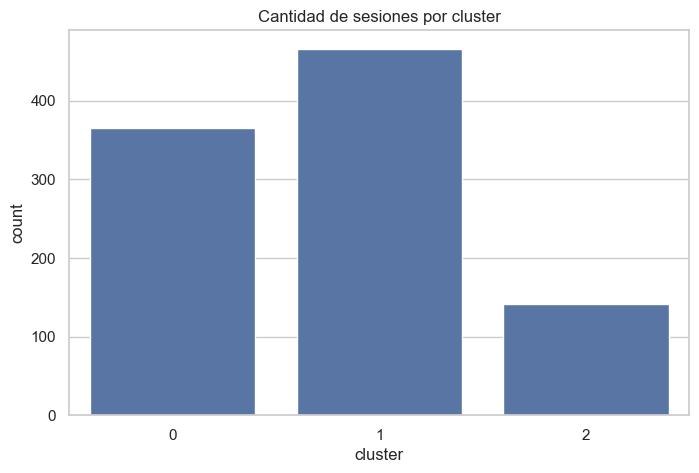

In [129]:
# 7. Ver cu√°ntas sesiones hay en cada cluster
print("\n #7. Cantidad de sesiones por cluster:")
print(dataset['cluster'].value_counts())

# Gr√°fico de barras para cantidad de sesiones por cluster
plt.figure(figsize=(8, 5))
sns.countplot(x='cluster', data=dataset)
plt.title('Cantidad de sesiones por cluster')
plt.show()

### Paso 8. Visualizaci√≥n mediante Reducci√≥n de Dimensionalidad para ver c√≥mo se agrupan visualmente los clusters

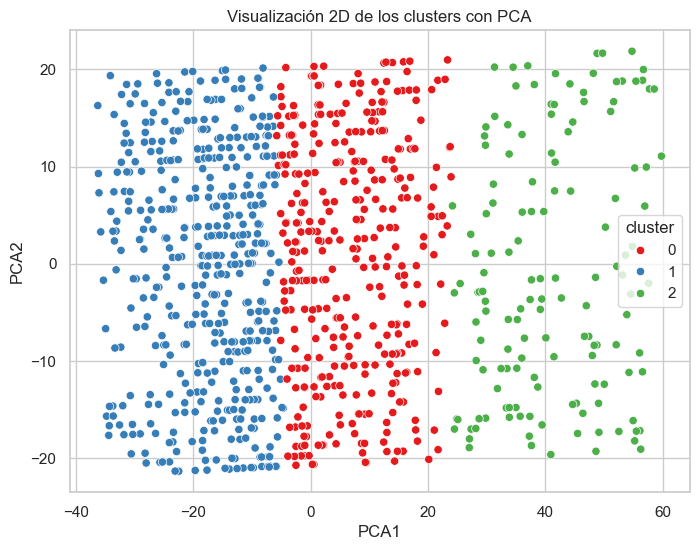

In [130]:
# Visualizaci√≥n tipo PCA

pca = PCA(n_components=2)
pca_components = pca.fit_transform(X)

df_plot = pd.DataFrame(pca_components, columns=['PCA1', 'PCA2'])
df_plot['cluster'] = dataset['cluster']

plt.figure(figsize=(8, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='cluster', data=df_plot, palette='Set1')
plt.title('Visualizaci√≥n 2D de los clusters con PCA')
plt.show()

### Paso 9. Frecuencia de cada tipo de ejercicio por cluster


In [131]:
# Ver frecuencia de cada tipo de ejercicio por cluster
for tipo in ['Workout_HIIT', 'Workout_Strength', 'Workout_Yoga', 'Workout_Cardio']:
    print(f'\nFrecuencia media de {tipo} por cluster:')
    print(dataset.groupby('cluster')[tipo].mean())


Frecuencia media de Workout_HIIT por cluster:
cluster
0    0.232877
1    0.221030
2    0.232394
Name: Workout_HIIT, dtype: float64

Frecuencia media de Workout_Strength por cluster:
cluster
0    0.263014
1    0.281116
2    0.218310
Name: Workout_Strength, dtype: float64

Frecuencia media de Workout_Yoga por cluster:
cluster
0    0.254795
1    0.240343
2    0.239437
Name: Workout_Yoga, dtype: float64

Frecuencia media de Workout_Cardio por cluster:
cluster
0    0.249315
1    0.257511
2    0.309859
Name: Workout_Cardio, dtype: float64


## Paso 10 ‚Äì Interpretaci√≥n de Clusters (K=3)

### üîµ Cluster 0 ‚Äì Usuarios intermedios y constantes

- **Edad promedio**: 39.4 a√±os  
- **Peso / Altura / IMC**: 80.3 kg, 1.75 m, IMC de 26.6  
- **Grasa corporal**: 23.3%  
- **Nivel de experiencia**: 2.0  
- **Frecuencia de entrenamiento**: 3.5 d√≠as/semana  
- **Tipo de ejercicio m√°s frecuente**: fuerza, HIIT y yoga en proporciones equilibradas.

**Interpretaci√≥n**:  
Usuarios maduros con h√°bitos consistentes y experiencia considerable. A pesar de un IMC ligeramente elevado, tienen buen control del porcentaje graso. Este grupo representa personas activas, posiblemente con buena masa muscular. Pueden beneficiarse de programas para mejorar composici√≥n corporal o mantener su estado f√≠sico actual.

---

### üü† Cluster 1 ‚Äì Usuarios j√≥venes y delgados

- **Edad promedio**: 38.7 a√±os  
- **Peso / Altura / IMC**: 56.7 kg, 1.68 m, IMC de 20.3  
- **Grasa corporal**: 26.3%  
- **Nivel de experiencia**: 1.8  
- **Frecuencia de entrenamiento**: 3.3 d√≠as/semana  
- **Tipo de ejercicio m√°s frecuente**: fuerza

**Interpretaci√≥n**:  
Aunque presentan un IMC bajo (delgadez), el porcentaje de grasa corporal es relativamente alto, lo cual sugiere poca masa muscular (sarcopenia). Este grupo tiene margen de mejora en cuanto a composici√≥n corporal. Ideal para planes orientados al aumento de fuerza y masa muscular. Su frecuencia de entrenamiento es adecuada, pero puede optimizarse la intensidad.

---

### üî¥ Cluster 2 ‚Äì Usuarios con obesidad y baja frecuencia

- **Edad promedio**: 36.6 a√±os  
- **Peso / Altura / IMC**: 113.5 kg, 1.80 m, IMC de 35.6  
- **Grasa corporal**: 24.9%  
- **Nivel de experiencia**: 1.5  
- **Frecuencia de entrenamiento**: 2.9 d√≠as/semana  
- **Tipo de ejercicio m√°s frecuente**: cardio

**Interpretaci√≥n**:  
Grupo con obesidad evidente y baja experiencia. A pesar de su alto peso corporal, el porcentaje graso no es desproporcionado, lo cual sugiere presencia de masa muscular. Sin embargo, su estilo de vida requiere mejoras sustanciales. Son candidatos ideales para intervenciones de p√©rdida de peso progresiva y programas adaptados a bajo impacto.

---

### üî• Implicaciones en la predicci√≥n de calor√≠as quemadas

De acuerdo con el perfil f√≠sico y h√°bitos de entrenamiento, se espera el siguiente orden de gasto cal√≥rico (de menor a mayor):

1. üü† Cluster 1 ‚Äì Bajo peso, poca masa muscular  
2. üîµ Cluster 0 ‚Äì Actividad media-alta, buena condici√≥n  
3. üî¥ Cluster 2 ‚Äì Alta masa corporal, aunque baja frecuencia



### Centroides Escalados

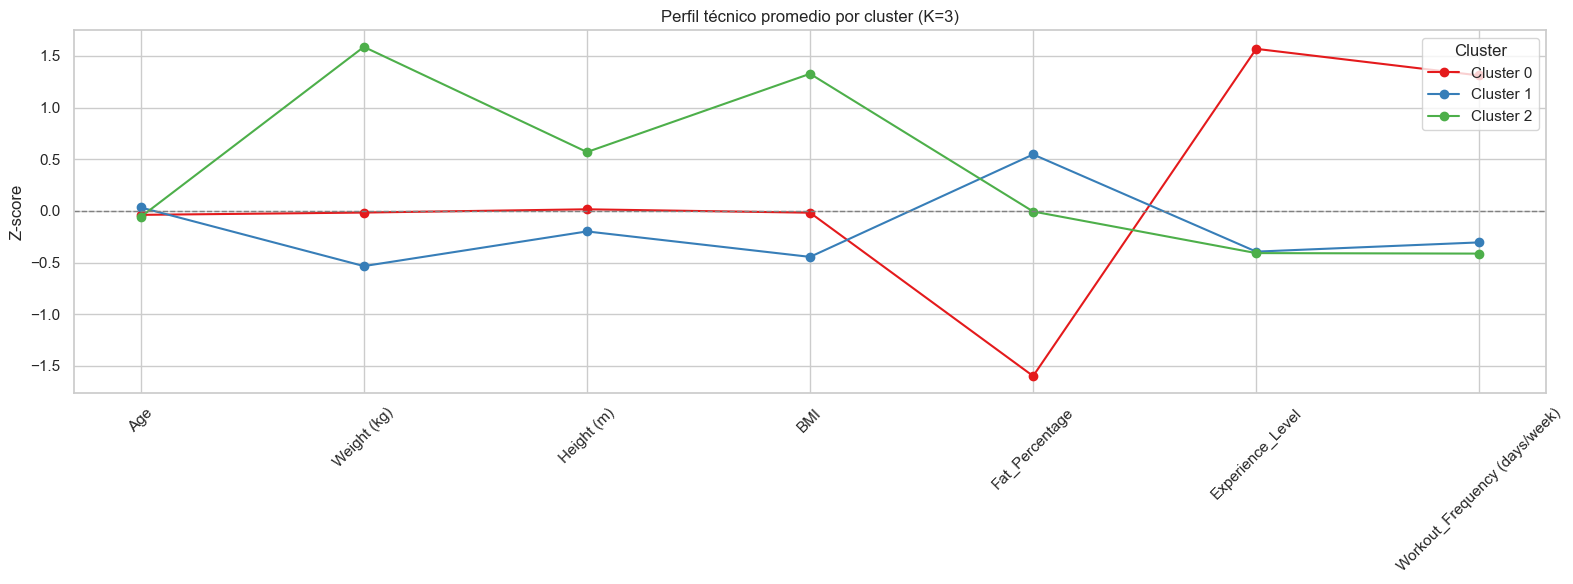


Centroides Z-score por cluster:
cluster                           0     1     2
Age                           -0.04  0.03 -0.06
Weight (kg)                   -0.02 -0.53  1.59
Height (m)                     0.02 -0.20  0.57
BMI                           -0.02 -0.45  1.33
Fat_Percentage                -1.60  0.55 -0.01
Experience_Level               1.57 -0.39 -0.41
Workout_Frequency (days/week)  1.31 -0.31 -0.41


In [142]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# A√±adir cluster a los datos escalados
df_scaled = pd.DataFrame(X_scaled, columns=features)
df_scaled['cluster'] = dataset['cluster']

# Calcular la media estandarizada (Z-score) de cada atributo por cluster
centroids_z = df_scaled.groupby('cluster').mean().T

# Representaci√≥n gr√°fica estilo perfil t√©cnico (l√≠neas con marcadores)
plt.figure(figsize=(16, 6))
sns.set(style="whitegrid")
palette = sns.color_palette("Set1", n_colors=centroids_z.shape[1])

for i, col in enumerate(centroids_z.columns):
    plt.plot(centroids_z.index, centroids_z[col], marker='o', label=f'Cluster {col}', color=palette[i])

plt.title("Perfil t√©cnico promedio por cluster (K=3)")
plt.ylabel("Z-score")
plt.xticks(rotation=45)
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.legend(title="Cluster", loc="upper right")
plt.tight_layout()
plt.show()

centroids_table = df_scaled.groupby('cluster').mean().T.round(2)
print("\nCentroides Z-score por cluster:")
print(centroids_table)

#### Generamos un nuevo dataset para a√±adir al que ya teniamos una nueva columna Cluster. Cada sesion de entrenamiento tendr√° asignado el Cluster al que representa

In [134]:
dataset['cluster'] = kmeans.fit_predict(X_scaled)
dataset.to_csv("dataset_con_clusters.csv", index=False)

In [135]:
import joblib

# Guardar el scaler y el modelo KMeans
joblib.dump(scaler, "scaler.pkl")
joblib.dump(kmeans, "kmeans.pkl")

['kmeans.pkl']

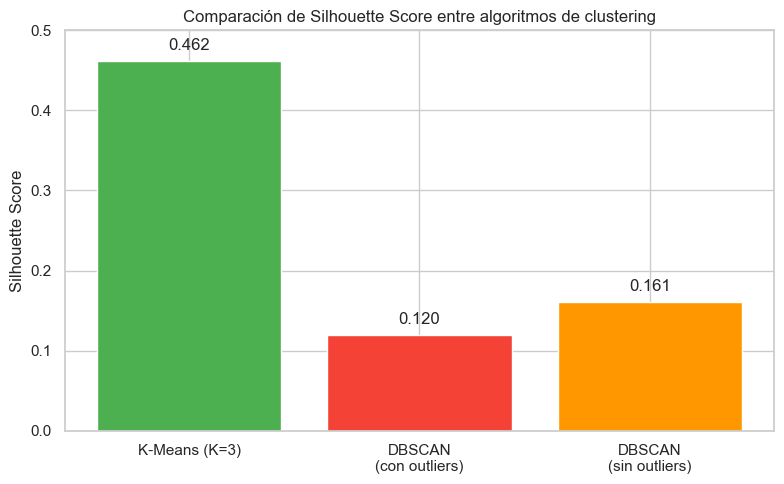

In [141]:
import matplotlib.pyplot as plt

# Datos
algorithms = ['K-Means (K=3)', 'DBSCAN\n(con outliers)', 'DBSCAN\n(sin outliers)']
silhouette_scores = [0.462, 0.120, 0.161]

# Gr√°fica
plt.figure(figsize=(8, 5))
bars = plt.bar(algorithms, silhouette_scores, color=['#4CAF50', '#F44336', '#FF9800'])
plt.ylim(0, 0.5)
plt.title('Comparaci√≥n de Silhouette Score entre algoritmos de clustering')
plt.ylabel('Silhouette Score')

# A√±adir etiquetas a las barras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f"{yval:.3f}", ha='center', va='bottom')

plt.tight_layout()
plt.show()
